# Homework 1: crack Alex's phone code

### Rules:
 - You should write the solution in this notebook and upload the completed notebook on Moodle by the deadline.
 - You are not allowed to work in groups, every student should submit their own notebook. If you submit two highly overlapping notebooks with another student, you will both be penalized.
 - The bonus questions are optional. They are not needed to get the full grade, but they can help you to get a higher grade.

### The setting

Your friend Alex wants to hide a secret code in a probability distribution. The probability density function is a piecewise linear distribution with parameters $0<a\le b$, defined as
$$p(x;a,b) = H(a,b) \begin{cases} \frac{x}{a} & \text{if } 0 \leq x \leq a, \\ \frac{b-x}{b-a} & \text{if } a \leq x \leq b, \\ 0 & \text{otherwise.} \end{cases}$$
where $H(a,b)$ is a normalization constant. Alex has choosen $a$ and $b$ such that they are the first two and the last two digits of his phone secret code, respectively.
For example, if their secret code is 1234, then $a=12$ and $b=34$. Alex stores some sample values of the distribution in a file called on their computer, thinking that nobody will be able to understand the distribution without the secret code.

You recently enrolled at EPFL and you are taking the course of _Fundamental of Inference and Learning_, and you want to prove that Alex's phone code is not safe. In this problem, your goal is to discover the secret code by studying the distribution.

## Part 1: Properties of the distribution

The distribution $p(x;a,b)$ is a valid distribution, i.e., it is normalized and it is non-negative. In this part, you will find many properties of the distribution.

 - **Question 1.** Find the normalization constant $H(a,b)$.

For the pdf we need to set

$$

\int_{-\infty}^{\infty} p(x;a,b) \, dx = 1

$$
that, bacuse the function is different from zero only in the interval $(0,b]$, it becomes
$$
\int_{0}^{b} p(x;a,b) \, dx = 1
$$
That can be solvedd as:
$$

\int_{0}^{b} p(x;a,b) \, dx = \int_{0}^{a} H(a,b) \cdot \frac{x}{a} \, dx + \int_{a}^{b} H(a,b) \cdot \frac{b-x}{b-a} \, dx =
\\[5mm]
= \int_{0}^{a} H(a,b) \cdot \frac{x}{a} \, dx + \int_{a}^{b} H(a,b) \cdot \frac{b}{b-a} \, dx - \int_{a}^{b} H(a,b) \cdot \frac{x}{b-a} =
\\[5mm]
= H(a,b) \cdot \left( \frac{x^2}{2a} \, \Bigg|_0^a + \frac{b}{b-a} x \, \Bigg|_a^b - \frac{x^2}{2(b-a)} \, \Bigg|_a^b \right) =
\\[5mm]
= H(a,b) \cdot \left( \frac{a^2}{2a} + \frac{b^2 - ab}{b-a} - \frac{b^2 - a^2}{2(b-a)} \right) =
\\[5mm]
= H(a,b) \cdot \left( \frac{a}{2} + \frac{b(b-a)}{b-a} - \frac{(b-a)(b+a)}{2(b-a)} \right) =
\\[5mm]
= H(a,b) \cdot \left( \frac{a}{2} + b - \frac{(b+a)}{2} \right) =
\\[5mm]
= H(a,b) \cdot \left( b - \frac{b}{2} \right) = H(a,b) \cdot \frac{b}{2} = 1

$$
Now, to obtain $H(a,b)$ we just need to solve the equation $$ H(a,b) \cdot \frac{b}{2} = 1 $$
that leads to:
$$
H(a,b) = \frac{2}{b}
$$

- **Question 2.** Compute the expected value $\mu$ of the distribution.

The expected value $\mu$ of the distribution is defined as:
$$
\mu = \mathbb{E}[x]
$$
where $\mathbb{E}[x]$ is

$$
\mathbb{E}[x] = \int_{-\infty}^{\infty} x \cdot p(x; a,b) \, dx = \int_{0}^{b} x \cdot p(x; a,b) \, dx =
\\[5mm]
= \frac{2}{b} \int_{0}^{a} x \cdot \frac{x}{a} \, dx \; + \;  \frac{2}{b} \int_{a}^{b} x \cdot \frac{b-x}{b-a} \, dx =
\\[5mm]
= \frac{2}{b} \int_{0}^{a} \frac{x^2}{a} \, dx 1\; + \;  2 \int_{a}^{b} \frac{x}{b-a} \, dx \; - \; \frac{2}{b} \int_{a}^{b} \frac{x^2}{b-a} =
\\[5mm]
= \frac{2}{ab} \frac{x^3}{3} \, \Bigg|_{0}^a \; + \; \frac{x^2}{b-a} \, \Bigg|_a^b \; - \; \frac{2}{b(b-a)} \frac{x^3}{3} \, \Bigg|_a^b =
\\[5mm]
= \frac{2}{ab} \frac{a^3}{3} \; + \frac{b^2 - a^2}{b-a} \; - \; \frac{2}{b(b-a)} \frac{(b^3 - a^3)}{3} =
$$ 
I add and subtract the terms to complete the cube of the binome at the numerator of the third fraction

$$
\\[5mm]
= \frac{2a^2}{3b} \; + \; \frac{(b-a)(b+a)}{b-a} \; - \; \frac{2}{3b} \frac{(b^3 - a^3 - 3b^2a + 3ba^2) + 3b^2a - 3ba^2}{(b-a)} =
\\[5mm]
= \frac{2a^2}{3b} \; + \; (b+a) \; - \; \frac{2}{3b} \frac{(b-a)^3 + 3ba(b-a)}{(b-a)} = 
\\[5mm]
= \frac{2a^2}{3b} \; + \; b \; + \; a \; - \; \frac{2}{3b} (b-a)^2 \; - \; 2a =
\\[5mm]
= \frac{2a^2}{3b} \; + \; b \; - \; a \; - \; \frac{2}{3b}b^2 \; + \; \frac{2}{3b}2ab \; - \; \frac{2a^2}{3b} =
\\[5mm]
= b \; - \; a \; - \; \frac{2}{3}b \; + \; \frac{4}{3}a \; = \; \frac{1}{3}b + \frac{1}{3}a \; = \; \frac{1}{3}(b+a)

$$
Therefore
$$
\mu = \frac{1}{3}(b+a)
$$

- **Question 3.** Compute the _cumulative density function_ $F(t)$ of the distribution.

The cumulative density function is defined as 
$$
F(t) \; = \; \mathbb{P}(x \leq t)
$$

From that, it follows that if:
- $ t < 0$, $F(t) \; = \; 0$
- $ t > b$, $F(t) \; = \; 1$

Instead for $0 < t \leq b$ we can define the two cases:
- $0 < t \leq a$
$$
F(t) \; = \; \int_0^t \frac{2}{b} \cdot \frac{x}{a} \, dx \; = \; \frac{x^2}{b\cdot a} \, \Bigg|_0^t \; = \; \frac{t^2}{b \cdot a}
$$

- $a < t  \leq b$
$$
F(t) \; = \; \int_0^a \frac{2}{b} \cdot \frac{x}{a} \, dx \; + \; \int_a^t \frac{2}{b} \cdot \frac{b-x}{b-a} \, dx \; =
\\[5mm]
= \; \frac{x^2}{b\cdot a} \, \Bigg|_0^a \; + \; \int_a^t \frac{2}{b} \cdot \frac{b}{b-a} \,dx \; - \; \int_a^t \frac{2}{b} \cdot \frac{x}{b-a} \; =
\\[5mm]
= \; \frac{a^2}{b \cdot a} \; + \; \frac{2x}{b-a} \, \Bigg|_a^t \; - \; \frac{x^2}{b(b-a)} \, \Bigg|_a^t \; =
\\[5mm]
= \; \frac{a}{b} \; + \; \frac{2t - 2a}{b-a} \; - \; \frac{t^2 - a^2}{b(b-a)} \; =
\\[5mm]
= \; \frac{a(b-a) + b(2t-2a) - (t^2-a^2)}{b(b-a)} \; = 
\\[5mm]
= \; \frac{ab - a^2 + 2bt - 2ab - t^2 + a^2}{b(b-a)} \; = \; \frac{-t^2 + 2bt - ab}{b(b-a)}
$$

So $F(t)$ is

$$

F(t) =
\begin{cases}
  0 & t < 0\\[2mm]
  \frac{t^2}{ab} & 0 \leq t \leq a\\[2mm]
  \frac{-t^2 + 2bt - ab}{b(b-a)} & a < t \leq b  \\[2mm]
  1 &  t > b
\end{cases}

$$

* **Question 4.** Compute the median $m$ of the distribution. (Be careful, there are some special cases to consider according to the value $a$ and $b$)

The median is found as the value $t$ s.t. $F(t) \; = \; \frac{1}{2}$

- For $0 \leq t \leq a$
$$
F(t) \; = \; \frac{t^2}{ab} \; = \; \frac{1}{2}
$$

Solve for $t$:

$$
t^2 \; = \; \frac{1}{2} ab
\\[5mm]
t \; = \; \pm \sqrt{\frac{1}{2}ab}
$$
Exclude the negative solution, as $t \geq 0$ and get $ t \; = \; \sqrt{\frac{1}{2}ab} $.

To obtain where this solution is valid we use the condition $t \leq a$, thus we must set
$$
\sqrt{\frac{ab}{2}} \leq a
\\[5mm]
\frac{ab}{2} \leq a^2
\\[5mm]
ab \leq 2a^2
\\[5mm]
2a^2 - ab \; = \; a(2a-b) \geq 0
$$
As we are given the condition $a > 0$, we can divide both sides by $a$ and the inequality still exists and does not change sign. So we have

$$
2a - b \geq 0
\\[5mm]
a \geq \frac{b}{2}
$$

The solution obtained means that the median $m$ is in the interval $[0, a]$ when $a \geq \frac{b}{2}$ and it has the value $m = \sqrt{\frac{ab}{2}}$

- For $a < t \leq b$
$$
F(t) \; = \; \frac{-t^2 + 2bt - ab}{b(b-a)}  \; = \; \frac{1}{2}
$$ 
Solve the equation for t
$$
-t^2 + 2bt - ab \; = \; \frac{1}{2} \cdot b(b-a)
\\[5mm]
-t^2 + 2bt - ab - \frac{1}{2} \cdot b(b+a) \; = \; 0
\\[5mm]
\Delta \; = \; 4b^2 \; - \; 2\cdot b(b+a) \; = \; 4b^2 \; - \; 2b^2 \; - \; 2ab \; = \; 2b^2 \; - \; 2ab \; = \; 2b(b-a)
$$
$\Delta \geq 0$ because $a > 0, \; b > a$
$$
m \; = \; \frac{-2b \; \pm \; \sqrt{2b(b-a)}}{-2} \; = \; \frac{2b \; \mp \; \sqrt{2b(b-a)}}{2} = b \; \mp \; \sqrt{\frac{b(b-a)}{2}}
$$
As the median cannot be greater than $b$, then we exlude the solution with the $+$ sign.
We are left with
$$
m \; = \; b \; - \; \sqrt{\frac{b(b-a)}{2}}
$$

To check for which values this solution is valid we set
$$
b \; - \; \sqrt{\frac{b(b-a)}{2}} \; \geq \; a
\\[5mm]
b-a \geq \sqrt{\frac{b(b-a)}{2}}
\\[5mm]
(b-a)^2 \geq \frac{b(b-a)}{2}
$$
$(b-a) > 0$ and thus we can divide both sides by it
$$
(b-a) \geq \frac{b}{2}
\\[5mm]
a \leq \frac{b}{2}
$$
This means that the median is in the interval $[a, b]$ when $a \leq \frac{b}{2}$ and it takes the value $m \; = \; b \; - \; \sqrt{\frac{b(b-a)}{2}}$

To sum up, the median is:
$$
m =
\begin{cases}
 \sqrt{\frac{ab}{2}} & a \geq \frac{b}{2}\\[2mm]
  b \; - \; \sqrt{\frac{b(b-a)}{2}} & a \leq \frac{b}{2}  \\[2mm]
\end{cases}
$$

- **Question 5.** Are the expected value and the median equal? How do the compare with the mode of the distribution? Comment the results.

The expected value and the mean are not equal in general.

The mode, instead is always equal to the value $a$, as it is where most of the probability is concentrated.

In the particular case where $a = \frac{b}{2}$, then the distribution becomes symmetric and mean, median and mode take the same value, that is $a$.

If $a < \frac{b}{2}$, then the mean and the median are greater than $a$.

For the median, it has been discussed in Question 4. For the mean, to show that, it can be said the following:

Given $\epsilon > 0$, we set $ a = \frac{b}{2} - \epsilon < \frac{b}{2}$

Then, the mean is

$$
\mu \; = \; \frac{a+b}{3} \; = \; \frac{1}{3} \cdot (\frac{b}{2} - \epsilon + b) \; = \; \frac{1}{3} \cdot (\frac{3b}{2} - \epsilon) \; = \; \frac{b}{2} \; - \; \frac{\epsilon}{3} 
$$
Being $\frac{\epsilon}{3} < \epsilon$, then $a < \mu < \frac{b}{2}$. So, if $a < \frac{b}{2}$ the mean is larger than the mode and it is in the interval $(a, \frac{b}{2})$.

Analogously, for $a > \frac{b}{2}$, we have the mean and the median smaller than the mode. For the median, again, it follows the same discussion of Question 4. For the mean we can use the same technique as before:

Set $ a = \frac{b}{2} + \epsilon > \frac{b}{2}$

Then the mean is computed as
$$
\mu \; = \; \frac{1}{3} \cdot (\frac{b}{2} + \epsilon + b) \; = \; \frac{1}{3} \cdot (\frac{3b}{2} + \epsilon) \; = \; \frac{b}{2} \; + \; \frac{\epsilon}{3} 
$$

In that case then $\frac{b}{2} < \mu < a$, so the mean is smaller than the mode and it is in the interval $(\frac{b}{2}, a)$.


## Part 2: Discovering the secret code from samples
You have seen Alex typing the code once, and you know that the last 2 digits are "20", hence $b=20$, and your goal is to estimate the first two digits $a^\star$. In this part, you can work as if you knew the value of $b$, and the distribution depends only on $a$. You also got the file `fixed_b.npy`with samples coming from the distribution $p(x;a=a^\star, b=20)$ that your friend Alex stored in the computer.

In [1015]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#### Question 6

- **Question 6.** Implement a function `pdf(x, a, b=20)` that computes the probability density function $p(x;a,20)$, and plot it for $b=20$ and $a$ of your choice.

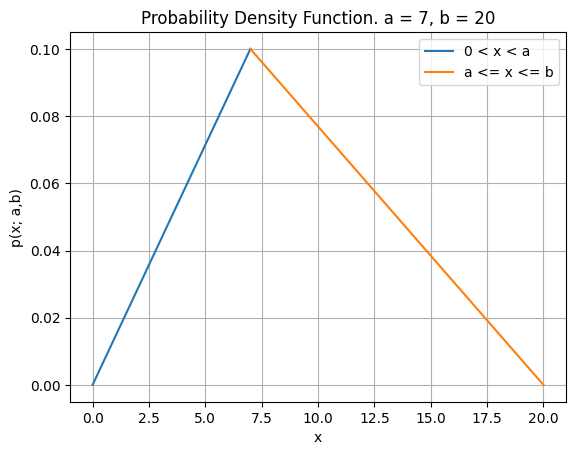

In [940]:
def pdf(x, a, b):
    H = 2/b
    if np.isscalar(x):
        if x >= 0 and x <= a:
            p_x = H * x/a
        elif x > a and x <= b:
            p_x = H * (b-x)/(b-a)
        else:
            p_x = 0
        return p_x
    else:
        return np.piecewise(x, [(x >= 0) & (x <= a), (x > a) & (x <= b), (x > b) | (x < 0)], 
                            [lambda x: H * x/a, lambda x: H * (b-x)/(b-a), 0]) 

a = 7
b = 20
x_P1 = np.linspace(0, a)
x_P2 = np.linspace(a,b)[1:]
x = np.zeros(len(x_P1) + len(x_P2))
x[0:len(x_P1)] = x_P1
x[len(x_P1):]  = x_P2

#piece1, piece2 = pdf(x, a, b=20)
y = np.array([pdf(i, a, b) for i in x])
idx_P1 = np.where(np.logical_and(x >= 0, x <= a))
idx_P2 = np.where(np.logical_and(x >= a, x <= b))


plt.plot(x[idx_P1], y[idx_P1], label=f'0 < x < a')
plt.plot(x[idx_P2], y[idx_P2], label=f'a <= x <= b')
plt.title('Probability Density Function. a = 7, b = 20')
plt.xlabel('x')
plt.ylabel('p(x; a,b)')
plt.grid(True)
plt.legend()
plt.show()


### Question 7

- **Question 7** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data

In the file there are 100 sample points


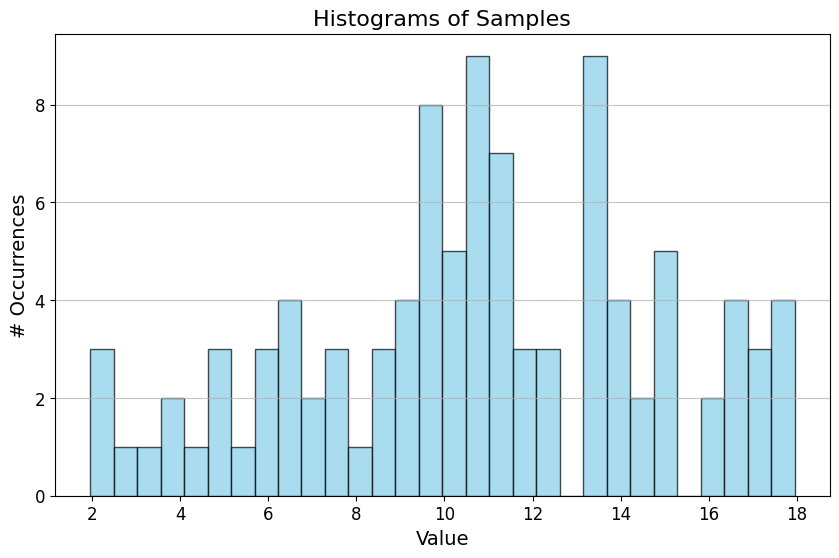

In [941]:

data_fixed_b = np.load('fixed_b.npy')

n = len(data_fixed_b)
print(f"In the file there are {n} sample points")

plt.figure(figsize=(10, 6))
plt.hist(data_fixed_b, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograms of Samples', fontsize=16)  
plt.xlabel('Value', fontsize=14) 
plt.ylabel('# Occurrences', fontsize=14)  
plt.grid(axis='y', alpha=0.75)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()  

### Question 8

- **Question 8.** Compute the empirical mean $\bar x$ and the empirical median $\bar m$. 

In [942]:
mean = np.mean(data_fixed_b)
m    = np.median(data_fixed_b)

print(f"Mean = {mean}")
print(f"Median = {m}")

Mean = 10.739751742853539
Median = 10.700494688840413


- **Question 9.** Use the expression of the expected value you computedabove to find an estimator $\hat a_\text{mean}$ of the true parameter $a^\star$, as a function of the empirical mean $\bar x$. Repeat the same for the median, and find $\hat a_\text{median}$ as a function of the empirical median $\bar m$.

To find an estimator for the mean and median we can invert the expressions found above and take the value of $a$ out of them.

The mean is:
$$
\mu \; = \; \frac{a+b}{3}
$$
Then
$$
3\mu \; = \; a+b
\\[5mm]
\hat{a}_{mean} \; = \; 3\mu - b 
$$
As from the dataset given we extract the empirical mean $\bar{x}$, then the estimator is:
$$
\hat{a}_{mean} \; = \; 3\bar{x} - b  
$$
For the median, we start with the expression:
$$
m =
\begin{cases}
 \sqrt{\frac{ab}{2}} & a \geq \frac{b}{2}\\[2mm]
  b \; - \; \sqrt{\frac{b(b-a)}{2}} & a \leq \frac{b}{2}  \\[2mm]
\end{cases}
$$

From that, we can find the estimator based on the empirical median and say:
- $a \geq \frac{b}{2} $:
$$
\bar{m} \; = \;  \sqrt{\frac{ab}{2}}
\\[5mm]
\bar{m}^2 \; = \;  \frac{ab}{2}
\\[5mm]
\hat{a}_{median} \; = \; \frac{2\bar{m}^2}{b}
$$

- $a \leq \frac{b}{2}$
$$
\bar{m} \; = \; b \; - \; \sqrt{\frac{b(b-a)}{2}}
\\[5mm]
b - \bar{m} \; = \; \sqrt{\frac{b(b-a)}{2}}
\\[5mm]
(b - \bar{m})^2 \; = \; \frac{b(b-a)}{2}
\\[5mm]
b^2 - 2b\bar{m} + \bar{m}^2 \; = \; \frac{b^2}{2} - \frac{ab}{2}
\\[5mm]
b^2 - 2b\bar{m} + \bar{m}^2 - \frac{b^2}{2} + \frac{ab}{2} \; = \; 0
\\[5mm]
\frac{ab}{2} \; = \; \frac{b^2}{2} - (b - \bar{m})^2
\\[5mm]
\hat{a}_{median} \; = \; \frac{2}{b} \cdot (\frac{b^2}{2} - (b - \bar{m})^2) = b - \frac{2}{b} \cdot (b - \bar{m})^2
$$

So the estimator based on the empirical median $\bar{m}$ is:
$$
\hat{a}_{median} =
\begin{cases}
 \frac{2\bar{m}^2}{b} & a \geq \frac{b}{2}\\[2mm]
  b - \frac{2}{b}(b - \bar{m})^2 & a \leq \frac{b}{2}  \\[2mm]
\end{cases}
$$


### Question 10

- **Question 10.** Implement a function `est_a_mean(x_bar, b=20)` and `est_a_median(m_bar, b=20)` that code the estimators you found above. What are the vaules of $\hat a_\text{mean}$ and $\hat a_\text{median}$ for the data you have in the file `fixed_b.npy`?

In [945]:
def estimator_mean(dataset, b):
    mean = np.mean(dataset)
    a_est = 3*mean - b      # mean = (a+b)/3
    return a_est

def estimator_median(dataset, b):
    median = np.median(dataset)
    a_est = median**2 * 2/b
    if a_est >= b/2:
        return a_est
    else:
        a_est = b - (2*(b-median)**2)/b
    return a_est
        

In [955]:
a_est_mean = estimator_mean(data_fixed_b, b=20)
a_est_median = estimator_median(data_fixed_b, b=20)

print(f"a estimated with mean = {a_est_mean:.3f}")
print(f"a estimated with median = {a_est_median:.3f}")

a estimated with mean = 12.219
a estimated with median = 11.450


### Question 11

 - **Question 11.** Consider the log-likelihood function $\mathcal{L}(a;\{x_i\}_{i\in[1,n]},b=20)$. Plot the log-likelihood function as a function of $a$ for the data in the file `fixed_b.npy`.

In [966]:
def loglh(a,b,x):
  logl = np.sum(np.log(pdf(x,a,b) + 1e-10))
  return logl

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\651086633.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\651086633.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14)


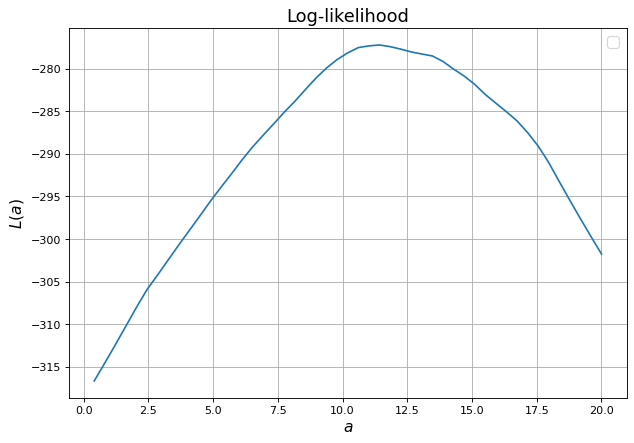

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\651086633.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14)


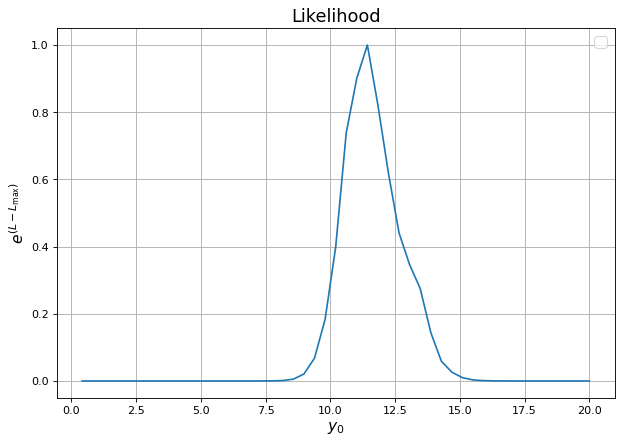

In [1067]:
a_tab = np.linspace(0,b)[1:]

loglh_tab = list()
for a in a_tab:
    l = loglh(a, b, data_fixed_b)
    loglh_tab.append(l)
    
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$a$', fontsize=14)
plt.ylabel('$L(a)$', fontsize=14)
plt.plot(a_tab,loglh_tab)
plt.legend(fontsize=14)
plt.grid()
plt.show()

# Plot also the exponential to see a sharper peak
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(a_tab,np.exp(loglh_tab-max(loglh_tab)))
plt.legend(fontsize=14)
plt.grid()
plt.show()


### Question 12

 - **Question 12.** What is the maximum likelihood estimator $\hat a_\text{MLE}$?

The maximum likelihood estimator is defined as:
$$
\hat a_\text{MLE} \; = \; \argmax_{a} \sum_x log\left[ \,p(x | a, (b=20)) \, \right]
$$

In [968]:
a_ML_vec = list()

a_guess = np.random.uniform(0,20)
optimum = minimize(lambda a0:-loglh(a0,b,data_fixed_b), a_guess, method='Nelder-Mead')
a_ML_vec.append(optimum.x)

a_est_ML = np.array(a_ML_vec).mean()   
print(f"a ML estimation: {a_est_ML:.3f}")

a ML estimation: 11.366


### Question 13

- **Question 13.** Use bootstrapping to compute the 95% confidence interval for all the three $a$ estimators computed above.

In [969]:
def estimator_ML(dataset):
    a_guess = np.random.uniform(0,b)
    optimum = minimize(lambda a0:-loglh(a0,b,dataset), a_guess, method='Nelder-Mead') 
    return optimum.x[0]

In [987]:
reps = 1000
np.random.seed(123)
boot_dataset = np.random.choice(data_fixed_b, (reps,n), replace=True)

a_mean_boot = list()
a_median_boot = list()
a_ML_boot = list()

for d in boot_dataset:
    a_mean_boot.append(estimator_mean(d, b))
    a_median_boot.append(estimator_median(d, b))
    a_ML_boot.append(estimator_ML(d))
    
mean_CI = np.percentile(a_mean_boot, [2.5, 97.5])
median_CI = np.percentile(a_median_boot, [2.5, 97.5])
ML_CI = np.percentile(a_ML_boot, [2.5, 97.5])

In [988]:
print(f"Confidence interval mean: lower = {mean_CI[0]:.3f}, upper = {mean_CI[1]:.3f}, width = {(mean_CI[1] - mean_CI[0]):.3f}")
print(f"Confidence interval median: lower = {median_CI[0]:.3f}, upper = {median_CI[1]:.3f}, width = {(median_CI[1] - median_CI[0]):.3f}")
print(f"Confidence interval ML: lower = {ML_CI[0]:.3f}, upper = {ML_CI[1]:.3f}, width = {(ML_CI[1] - ML_CI[0]):.3f}")

Confidence interval mean: lower = 9.825, upper = 14.453, width = 4.628
Confidence interval median: lower = 9.921, upper = 13.282, width = 3.362
Confidence interval ML: lower = 10.064, upper = 13.967, width = 3.903


 - **Question 14.** Compute the Fisher information of $a$ under the distribution $p(x;a,b=20)$.
 

The Fisher Information under the condition $b = 20$ is computed as:
$$
E \left[\, S_{a}^2(x) \, \right]
$$
where $S_{a}(x)$ is the Fisher score computed as:
$$
S_{a}(x) \; = \; \frac{\partial}{\partial a} \Big(log\left(p(x; a, b=20)\right)\Big)
$$

First we write the logarithm of the pdf for $b=20$:
$$
log\left(p(x; a, b=20)\right) =
\begin{cases}
 log\left(\, \frac{2}{b} \cdot \frac{x}{a} \, \right)\Bigg|_{b=20} = log\left(\, \frac{1}{10} \cdot \frac{x}{a} \, \right) & 0 \leq x \leq a\\[5mm]
  log\left(\, \frac{2}{b} \cdot \frac{b-x}{b-a} \, \right)\Bigg|_{b=20} = log\left(\, \frac{1}{10} \cdot \frac{20-x}{20-a} \, \right) & a \leq x \leq b  \\[3mm]
\end{cases}
$$
Recalling that the logarithm of the product/ratio is the sum/difference of the logarithms we have:
$$
log\left(p(x; a, b=20)\right) =
\begin{cases}
 -log\left(\,10 \, \right) + log\left(\,x \, \right) - log\left(\,a \, \right) & 0 \leq x \leq a\\[2mm]
 -log\left(\,10 \, \right) + log\left(\,20-x \, \right) - log\left(\,20-a \, \right) & a \leq x \leq b  \\[2mm]
\end{cases}
$$

And so the Fisher score becomes:
$$
S_{a}(x) \; = \; \frac{\partial}{\partial a} \Big(log\left(p(x; a, b=20)\right)\Big) \; = \;
\begin{cases}
 -\frac{1}{a} & 0 \leq x \leq a\\[2mm]
 \frac{1}{20-a} & a \leq x \leq b \\[2mm]
\end{cases}
$$
And consequently,
$$
S_{a}^2(x) \; = \;
\begin{cases}
 (\frac{1}{a})^2 & 0 \leq x \leq a\\[2mm]
 (\frac{1}{20-a})^2 & a \leq x \leq b \\[2mm]
\end{cases}
$$

Now, we need to take the expectation of $S_{a}^2(x)$:
$$
E \left[\, S_{a}^2(x) \, \right] = \frac{1}{10}\int_0^a \frac{x}{a}\cdot\frac{1}{a^2} \, dx \; + \;  \frac{1}{10}\int_a^b \frac{20-x}{20-a}\cdot\frac{1}{(20-a)^2} \, dx =
\\[5mm]
= \frac{1}{10} \cdot \frac{x^2}{2a^3}\,\Bigg|_0^a \; + \; \frac{2x}{(20-a)^3}\,\Bigg|_a^{b=20} \; - \; \frac{x^2}{20(20-a)^3}\,\Bigg|_a^{b=20} =
\\[5mm]
= \frac{a^2}{20a^3} \; + \; \frac{2(20-a)}{(20-a)^3} \; - \; \frac{20^2 - a^2}{20(20-a)^3} =
\\[5mm]
= \frac{1}{20a} \; + \; \frac{2}{(20-a)^2} \; - \; \frac{(20+a)(20 - a)}{20(20-a)^3} =
\\[5mm]
= \frac{1}{20a} \; + \; \frac{2}{(20-a)^2} \; - \; \frac{(20+a)}{20(20-a)^2} =
\\[5mm]
= \frac{(20-a)^2 + 40a - a(20+a)}{20a(20-a)^2} =
\\[5mm]
= \frac{20^2 - 40a + a^2 + 40a - 20a - a^2}{20a(20-a)^2} = 
\\[5mm]
= \frac{20^2 - 20a}{20a(20-a)^2} \; = \; \frac{20(20-a)}{20a(20-a)^2} = 
\\[5mm]
\frac{1}{a(20-a)}
$$

Therefore, as we have n samples in our dataset, by using the additivity of Fisher information we get:
$$
I_n(a) \; = \; nI(a) \; = \; \frac{n}{a(20-a)}
$$

- **Question 15.** Can you compute the maximum likelihood estimator using the Jeffrey Posterior $\hat a_\text{jeff}$? Provide also the confidence intervals.

From the Bayesan statistics, we know that, for our problem:
$$
p(a | x, b=20) \; \propto \; p(a|b=20) \cdot p(x | a, b=20 )
$$
where $p(a|b=20)$ is the prior, i.e. the probability distribution of $a$ (in this case given $b=20$). To compute the Jeffrey's estimator, we need to include the Jeffrey's prior in the formula.

Jeffrey's prior is computed as:
$$
p(a | b=20) \; \propto \; \sqrt{det[\,I_{n}(a)\,]} 
$$
In this case, the Fisher information is not a matrix, and thus the determinant is the number itself, so
$$
\sqrt{det[\,I_{n}(a)\,]} \; \propto \; \sqrt{\frac{1}{a(20-a)}}
$$

And so we can write the Jeffrey's prior as:
$$
p(a|b=20) \; \propto \; \sqrt{\frac{1}{a(20-a)}}
$$

In [1068]:

def jeffpost(a, b, x):
    jeff_prior = -0.5*np.log((a*(20-a)))
    jp = jeff_prior + np.sum(np.log(pdf(x,a,b) + 1e-10))
    return jp


<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\609316284.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\609316284.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14)


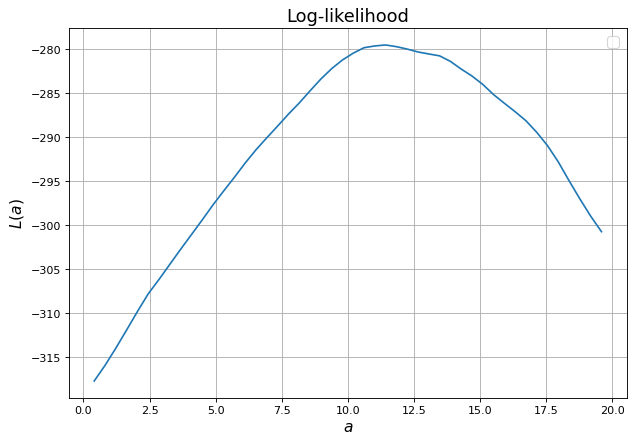

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\609316284.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14)


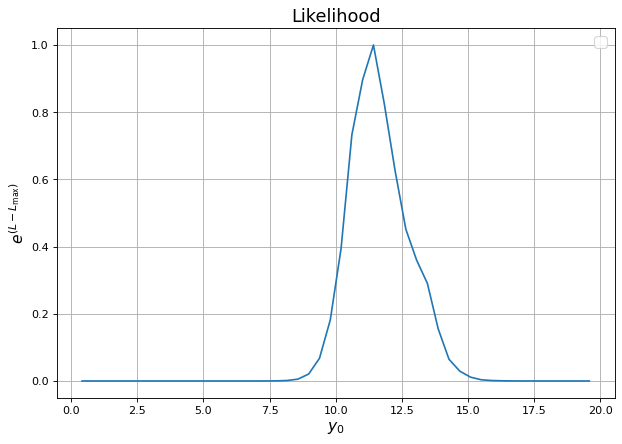

In [1069]:
a_tab = np.linspace(0,b)[1:-1]

jeff_tab = list()
for a in a_tab:
    l = jeffpost(a, b, data_fixed_b)
    jeff_tab.append(l)
    
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$a$', fontsize=14)
plt.ylabel('$L(a)$', fontsize=14)
plt.plot(a_tab,jeff_tab)
plt.legend(fontsize=14)
plt.grid()
plt.show()

# Plot also the exponential to see a sharper peak
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(a_tab,np.exp(jeff_tab-max(jeff_tab)))
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [1001]:
def estimator_jeff(dataset):
    a_guess = np.random.uniform(1,b-1)
    optimum = minimize(lambda a0:-jeffpost(a0,b,dataset), a_guess, method='Nelder-Mead') 
    return optimum.x[0]

a_est_jeff = estimator_jeff(data_fixed_b)
print(f"Estimation using Jeffrey's prios: {a_est_jeff:.3f}")

Estimation using Jeffrey's prios: 11.366


In [1004]:

a_jeff_boot = list()

for d in boot_dataset:
    a_jeff_boot.append(estimator_jeff(d))
    
jeff_CI = np.percentile(a_jeff_boot, [2.5, 97.5])
print(f"Confidence interval Jeffrey: lower = {jeff_CI[0]:.3f}, upper = {jeff_CI[1]:.3f}, width = {(jeff_CI[1] - jeff_CI[0]):.3f}")

Confidence interval Jeffrey: lower = 10.059, upper = 13.850, width = 3.791


All the estimation you derived couldn't find the secret code with absolute certainty. The confidence intervals you computed are too large to produce one single code. Moreover your friend is a bit paranoid and changes the code every week, so the information you have is not valid anymore. You need to find a better way to estimate the code.

### Test the estimators
You are still trying to sneak into your friend's computer to get new samples of the distribution. In the meanwhile, you want to test the estimators you derived on a synthetic dataset. Florent gave you this Python function to sample the distribution $p(x;a,b)$:


In [1005]:
import numpy as np
import matplotlib.pyplot as plt

def sample(a: float, b: float, size: int=1) -> np.array:
    def sample_single(a: float, b: float) -> float:
        u = 0
        v = b
        while not((u <= a and v <= 2/(a*b)*u) or (u > a and v <= 2/b *(b-u)/(b-a))):
            u = np.random.uniform(0, b)
            v = np.random.uniform(0, 2/b)
        return u
    return np.array([sample_single(a, b) for _ in range(size)])

- **Bonus question 1** The sampling function is not efficient. Can you provide a more efficient way to sample the distribution?

A faster way could be the inverse transform sampling.

Given the cdf $F(t)$ of the distribution, we sample a random variable $u$ from a uniform distribution.

Then, we set $F(t) = u$ and we find $t$, that is the value s.t. $P(x \leq t) = u$. That value $t$, is the sample from the distribution given.

As $t = F^{-1}(u)$, then we need to compute $F^{-1}(u)$ starting from $F(t)$.

Recall $F(t)$:
$$

F(t) =
\begin{cases}
  0 & x < 0\\[2mm]
  \frac{t^2}{ab} & 0 \leq t \leq a\\[2mm]
  \frac{-t^2 + 2bt - ab}{b(b-a)} & a < t \leq b  \\[2mm]
  1 & \text{if } x > b
\end{cases}

$$

- $0 \leq t \leq a$

$$
\frac{t^2}{ab} = u
\\[5mm]
t = \pm \sqrt{uab}
$$
As t must be greater than zero, we exlude the negative solution and remain with:
$$
t =  \sqrt{uab}
$$

- $a < t \leq b$
$$
\frac{-t^2 + 2bt - ab}{b(b-a)} = u
\\[5mm]
-t^2 + 2bt - ab - ub(b-a) = 0
\\[5mm]
t^2 - 2bt + ab + ub(b-a) = 0
\\[5mm]
\Delta = 4b^2 - 4ab - 4ub(b-a) = 4b(b-a) - 4ub(b-a) = 4b(b-a)(1-u)
\\[5mm]
t = \frac{2b \pm 2\sqrt{b(b-a)(1-u)}}{2} = b \pm \sqrt{b(b-a)(1-u)}
$$
As we are in the case $a < t \leq b$, we must exclude the solution with the $+$ sign and we get:
$$
t = b - \sqrt{b(b-a)(1-u)}
$$

We also need to compute the new intervals wrt u:

The first piece of cdf is defined in $0 \leq t \leq a$ and it is $\frac{t^2}{ab} = u$.
$$
\frac{t^2}{ab}\,\Bigg|_{t=0} = 0
\\[5mm]
\frac{t^2}{ab}\,\Bigg|_{t=a} = \frac{a}{b}
$$
So the first piece of $F^{-1}(u)$ is defined in $0 < u \leq \frac{a}{b}$

The second piece of the cdf is instead defined in $a \leq x \leq b$ and it is $\frac{-t^2 + 2bt - ab}{b(b-a)}$
$$
\frac{-t^2 + 2bt - ab}{b(b-a)}\,\Bigg|_{t=a} = \frac{-a^2 + ab}{b(b-a)} = \frac{a}{b}
\\[5mm]
\frac{-t^2 + 2bt - ab}{b(b-a)}\,\Bigg|_{t=b} = \frac{b^2 - ab}{b(b-a)} = 1
$$
The second piece of $F^{-1}(u)$ is defined in $\frac{a}{b} \leq u < 1$

Finally we get:
$$

F^{-1}(u) =
\begin{cases}
  0 & u \leq 0\\[2mm]
   \sqrt{uab} & 0 < u \leq \frac{a}{b}\\[2mm]
  b - \sqrt{b(b-a)(1-u)} & \frac{a}{b} < u < 1  \\[2mm]
  b &  u \geq 1
\end{cases}

$$

In [775]:
def inv_cdf(u, a, b):
    if u <= 0:
        return 0
    if u >= 1:
        return b
    
    t = np.sqrt(u*b*a)
    if 0 < t < a:
        return t
    else:
        t = b - np.sqrt(b*(b-a)*(1-u))
    return t

def sample_opt(a, b):
    u = np.random.uniform(0, 1)
    s = inv_cdf(u, a, b)
    return s

In [778]:
def sample_n_points(n, a, b):
    s = np.zeros(n)
    for i in range(n):
        s[i] = sample_opt(a, b)
    return s

In [1065]:
n = 100000
b = 20
a_tab = np.array([7, 14])
samples = list()
samples_given = list()
for a in a_tab:
    s = sample_n_points(n, a, b)
    s_given = sample(a, b, n)
    samples.append(s)
    samples_given.append(s_given)

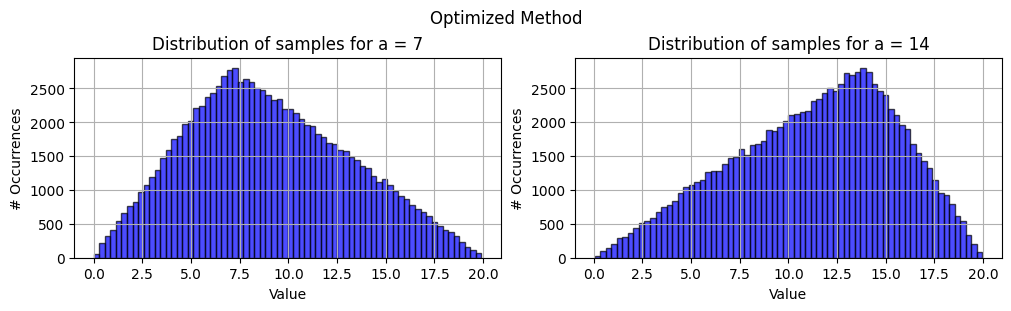

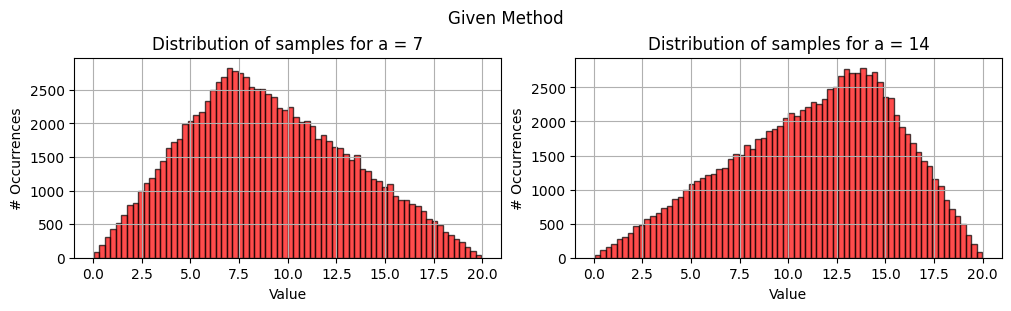

In [1066]:
# Plot one to verify

fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
axs = axs.flatten()
for i in range(len(a_tab)):
    axs[i].hist(samples[i], bins=70, color='blue', alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Distribution of samples for a = {a_tab[i]}')
    axs[i].set_ylabel('# Occurrences')
    axs[i].grid(True)
for ax in axs[-3:]:
    ax.set_xlabel('Value')
fig.suptitle('Optimized Method')
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
axs = axs.flatten()
for i in range(len(a_tab)):
    axs[i].hist(samples_given[i], bins=70, color='red', alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Distribution of samples for a = {a_tab[i]}')
    axs[i].set_ylabel('# Occurrences')
    axs[i].grid(True)
for ax in axs[-3:]:
    ax.set_xlabel('Value')
fig.suptitle('Given Method')
plt.show()



Having seen that the method works, we can verify if it is faster than the one provided.

In [318]:
%%timeit
samples = sample(a=7, b=20, size=10000)

106 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [319]:
%%timeit
samples = sample_n_points(n=10000, a=7, b=20)

48.6 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The function given takes a time of $106ms \pm 2.03ms$

The inverse transform method takes $48.6ms \pm 1.13ms$

Stick with the case where $b=20$, and sample $N=1000$ points from the distribution $p(x;a,b)$ for 10 values of $a\in[0,20]$.
- **Question 16.** Compute and plot the mean squared error of the 4 estimators for $\hat a_\text{mean}, \hat a_\text{median}, \hat a_\text{ML}$ and $\hat a_\text{Jeff}$, as well as the Cramér-Rao lower bound. Which one is the best? [Hint: to have a good estimate of the mean squared error, you can repeat the sampling 300 times and compute the average of the squared error, for each value of $a$; be patient, this will take some time to compute]

In [1052]:
n_sample = 1000
b = 20
a_tab = np.linspace(1e-5, 19.999, 20)


In [1062]:
def MSE(a_tab, n_reps, estimator, *args, **kwargs):
    #squared_error = np.zeros((len(a_tab), n_samples))
    mse = np.zeros(len(a_tab))
    a_est_list = list()
    for j,a in enumerate(a_tab):
        squared_error = np.zeros(n_reps)
        a_est = np.zeros(n_reps)
        for i in range(n_reps):
            s = sample_n_points(n=1000, a=a, b=20)
            a_est[i] = (estimator(s, *args, **kwargs))
            squared_error[i] = (a_est[i] - a)**2
        a_est_list.append(a_est)
        mse[j] = np.mean(squared_error)
    return mse, a_est_list
        


In [1063]:
n_reps = 500
mse_mean, a_est_mean = MSE(a_tab, n_reps, estimator_mean, b=20)
mse_median, a_est_median  = MSE(a_tab, n_reps, estimator_median, b=20)
mse_ML, a_est_ML = MSE(a_tab, n_reps, estimator_ML)
mse_jeff, a_est_jeff = MSE(a_tab, n_reps, estimator_jeff)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\1292173096.py:5: RuntimeWarning: invalid value encountered in log
  jeff_prior = -0.5*np.log((a*(20-a)))
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\1292173096.py:5: RuntimeWarning: divide by zero encountered in log
  jeff_prior = -0.5*np.log((a*(20-a)))
c:\Users\Alessandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:836: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


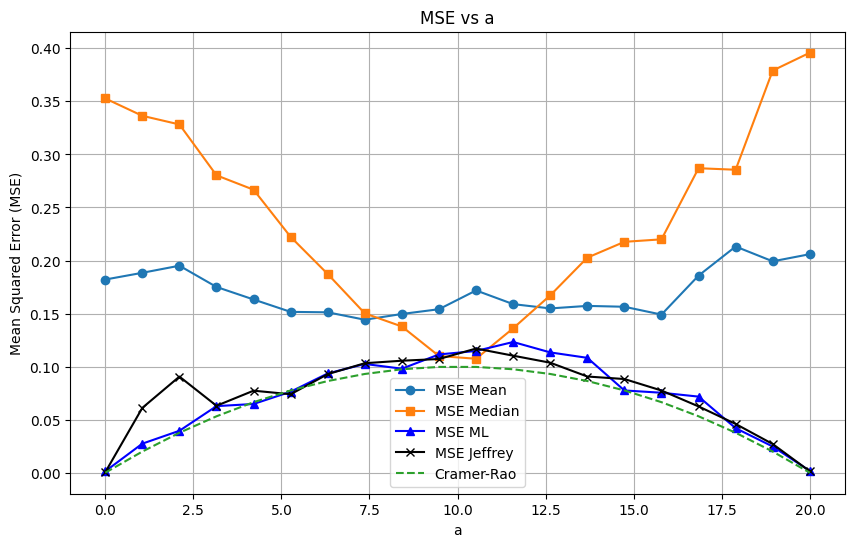

In [1064]:
plt.figure(figsize=(10, 6))

plt.plot(a_tab, mse_mean, label='MSE Mean', marker='o')
plt.plot(a_tab, mse_median, label='MSE Median', marker='s')
plt.plot(a_tab, mse_ML, label='MSE ML', marker='^', color='blue')
plt.plot(a_tab, mse_jeff, label='MSE Jeffrey', marker='x', color= 'black')
plt.plot(a_tab, a_tab*(20 - a_tab)/n_sample, label= "Cramer-Rao", linestyle='--' )
plt.xlabel('a')
plt.ylabel('Mean Squared Error (MSE)') 
plt.title('MSE vs a')
plt.legend()
plt.grid(True)
plt.show()

The median and mean estimators, as expected, are the ones with the lower performance. Indeed, the extraction of the empirical mean and median is too dependent on the given dataset. In the picture, their error becomes notably larger than the Cramer-Rao bound when $a$ gets values closer to the extremes of the interval $(0,b]$.

For ML and Jeffrey estimator, instead, the trend is similar to the one of the bound.

ML seems the best one: its MSE is larger or equal than the Cramer-Rao bound, but it follows it for all the values of $a$.

MSE of Jeffrey's estimator also follows the behaviour of the Cramer-Rao bound. Though, is not better than ML. Moreover, on the right part of the plot, for values of $a$ in between $0$ and $2$ the error increases, separating from the bound.

- **Bonus Question 2.** Why is the Jeffrey's prior estimator so bad? Can you provide a better bound for the variance of the estimator? [Hint: you might need `np.gradient` to solve this question, and increase the number of different values of $a$ to get a finer plot]

The MSE of Jeffrey's estimator I obtain does not present a really bad behaviour. It is close to ML and works better than the median and mean estimators.

However, in the previous question, when plotting the Cramer-Rao bound, we were considering zero bias. 

To provide a better bound for the estimator, we could recompute it including the bias term.

The true Cramer-Rao bound is:

$$
    MSE \geq bias^2 + \frac{1}{nI(a|b)}\left(1+\partial_{a} \,bias\right)^2
$$
with the $bias$ defined as:
$$
bias = \mathbb{E}\left[\hat{a}-a\right]
$$

In [908]:
n_reps = 500
a_tab = np.linspace(0, 20, 71)[1:]
mse_jeff2, a_est_list_jeff =  MSE(a_tab, n_reps, estimator_jeff)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_20636\3240198895.py:5: RuntimeWarning: divide by zero encountered in log
  jeff_prior = -0.5*np.log((a*(20-a)))
c:\Users\Alessandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_optimize.py:836: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


In [924]:
bias = np.zeros(len(a_tab))
for i,a_est in enumerate(a_est_list_jeff):
    bias[i] = np.mean(a_est - np.full(n_reps, a_tab[i]))

In [931]:
spacing = a_tab[1] - a_tab[0]
cramers_rao_new = bias**2 + a_tab*(20 - a_tab)/n_sample * (1 + np.gradient(bias, spacing, edge_order=2))**2 

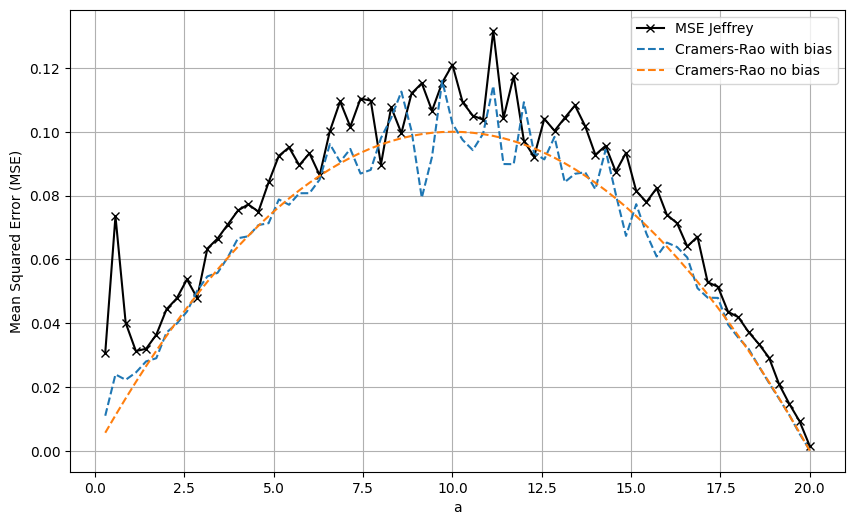

In [1023]:

plt.figure(figsize=(10, 6))

plt.plot(a_tab, mse_jeff2, label='MSE Jeffrey', marker='x',color= 'black')
plt.plot(a_tab, cramers_rao_new, label= "Cramers-Rao with bias", linestyle='--' )
plt.plot(a_tab, a_tab*(20 - a_tab)/n_sample, label= "Cramers-Rao no bias", linestyle='--' )
plt.xlabel('a')
plt.ylabel('Mean Squared Error (MSE)') 
plt.title('')
plt.legend()
plt.grid(True)
plt.show()

By adding the bias, we add a noise component to the bound, that follows more the MSE of Jeffrey's estimator. 

### Joint estimation case
You finally managed to get the file `full.npy` with the samples of the distribution $p(x;a,b)$ your friend Alex stored in the computer. You don't know the value of $b$, and you need to estimate both $a^\star$ and $b^\star$. (BE CAREFUL: $a^\star$ is different from the previous case).



- **Question 17.** How many sample points are there in the file? Let us call this number $n$ and plot an histogram of the data.

In [1024]:
dataset = np.load('full.npy')
n = len(dataset)
print(f"There are {n} sample points")

There are 10000 sample points


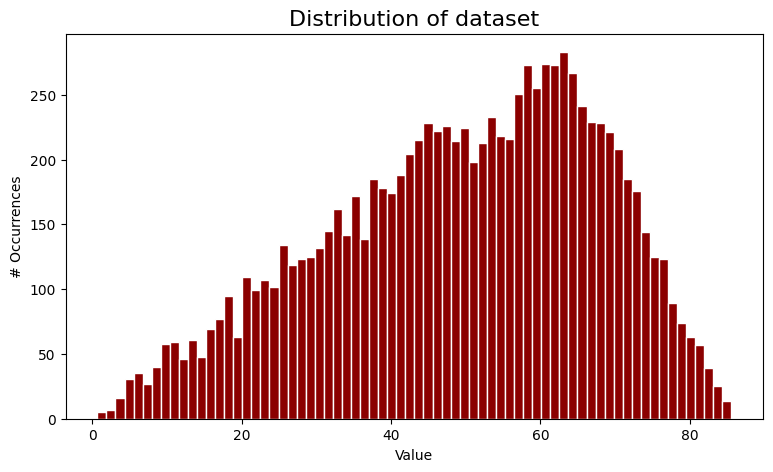

In [1025]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
plt.title("Distribution of dataset", size = 16)
ax.hist(dataset, bins=70, edgecolor='white', color ='darkred', label = f"x0")
plt.xlabel('Value')
plt.ylabel('# Occurrences')
#plt.grid()
plt.show()

- **Question 18.** Compute the maximum likelihood estimators $\hat a_\text{ML}$ and $\hat b_\text{ML}$ for the data in the file `full.npy`.


In [1027]:
def f(params):
  a,b = params
  return -loglh(a,b,dataset)

b = np.ceil(np.random.uniform(85,99))
a = np.ceil(np.random.uniform(1,b-1))
ab = (a,b)
optimum = minimize(f,ab, method='Nelder-Mead')
a_ML = optimum.x[0]
b_ML = optimum.x[1]

print(f"The estimated a is: {a_ML:.3f} and the estimated b is: {b_ML:.3f}")

The estimated a is: 62.994 and the estimated b is: 85.897


- **Question 19.** Can you provide the confidence intervals for the estimators? Can you guess the secret code of your friend?

In [1028]:
# Bootstrapping on the sampled values
reps = 1000
n = len(dataset)
boot_dataset = np.random.choice(dataset, (reps,n), replace=True)

a_est_list = list()
b_est_list = list()

def f(params):
  a,b = params
  return -loglh(a,b,d)

for i,d in enumerate(boot_dataset):
  b = np.ceil(np.random.uniform(max(d),99))
  a = np.ceil(np.random.uniform(1,b-1))
  ab = (a,b)
  optimum = minimize(f,ab, method='Nelder-Mead')
  a_est = optimum.x[0]
  b_est = optimum.x[1]
  a_est_list.append(a_est)
  b_est_list.append(b_est)
  
a_est_CI = np.percentile(a_est_list, [2.5, 97.5])
b_est_CI = np.percentile(b_est_list, [2.5, 97.5])

print(f"Confidence interval a: lower bound = {a_est_CI[0]:.3f}, upper bound = {a_est_CI[1]:.3f}")
print(f"Confidence interval b: lower bound = {b_est_CI[0]:.3f}, upper bound = {b_est_CI[1]:.3f}")

Confidence interval a: lower bound = 62.355, upper bound = 63.810
Confidence interval b: lower bound = 85.636, upper bound = 86.142


In [1029]:
print(f"Confidence interval a: lower bound = {a_est_CI[0]:.3f}, upper bound = {a_est_CI[1]:.3f}. Width = {(a_est_CI[1] - a_est_CI[0]):.3f}")
print(f"Confidence interval b: lower bound = {b_est_CI[0]:.3f}, upper bound = {b_est_CI[1]:.3f}. Width = {(b_est_CI[1] - b_est_CI[0]):.3f}")

Confidence interval a: lower bound = 62.355, upper bound = 63.810. Width = 1.455
Confidence interval b: lower bound = 85.636, upper bound = 86.142. Width = 0.506


In [653]:
a_est_list = np.array(a_est_list)
b_est_list = np.array(b_est_list)

a_final = round(np.mean(a_est_list))
b_final = round(np.mean(b_est_list))

print(f"a = {a_final}")
print(f"b = {b_final}")
print(f"Secret code = {a_final}{b_final}")

a = 63
b = 86
Secret code = 6386


- **Bonus Question 3.** Can you find some estimators for $a$ and $b$ that are based on mean and median? Do you expect them to work well? Why?

We can combine the mean and the median in a system of equations, and solve for both $a$ and $b$.

$$
\begin{cases}
  \bar{x} = \frac{a+b}{3}\\[2mm]
\bar{m} =
\begin{cases}
 \sqrt{\frac{ab}{2}} & a \geq \frac{b}{2}\\[2mm]
  b \; - \; \sqrt{\frac{b(b-a)}{2}} & a \leq \frac{b}{2}  \\[2mm]
\end{cases}
\end{cases}
$$

We derive $b$ from the equation of the mean and plug it in the equations of the meadian
$$
b = 3\bar{x} - a
$$

$$
\bar{m} =
\begin{cases}
 \sqrt{\frac{a(3\bar{x} - a)}{2}} & a \geq \frac{b}{2}\\[2mm]
  (3\bar{x} - a) \; - \; \sqrt{\frac{(3\bar{x} - a)(3\bar{x} - a-a)}{2}} & a \leq \frac{b}{2}  \\[2mm]
\end{cases}
$$

- $a \geq \frac{b}{2}$
$$
\bar{m} = \sqrt{\frac{a(3\bar{x} - a)}{2}}
\\[5mm]
\bar{m}^2 = \frac{a(3\bar{x} - a)}{2}
\\[5mm]
2\bar{m}^2 = a(3\bar{x} - a)
\\[5mm]
a^2 - 3\mu a + 2\bar{m}^2 = 0
\\[5mm]
\Delta = 9\mu^2 - 8\bar{m}^2
\\[5mm]
a = \frac{3\mu \pm \sqrt{9\mu^2 - 8\bar{m}^2}}{2}
$$
To choose the $+$ or $-$ sign we look recall that $b = 3\mu - a$ by mean and $b \geq a$ by definition of the problem.

This means that $3\mu - a \geq a$ and so $3\mu \geq 2a$.

As our estimation of $a$ is $a = \frac{3\mu \pm \sqrt{9\mu^2 - 8\bar{m}^2}}{2}$, then $2a = 3\mu \pm \sqrt{9\mu^2 - 8\bar{m}^2}$

Since $\sqrt{9\mu^2 - 8\bar{m}^2} \geq 0$, then to guarantee $3\mu \geq 2a$ we must take the solution with the $-$ sign, and therefore:
$$
a = \frac{3\mu - \sqrt{9\mu^2 - 8\bar{m}^2}}{2}
$$

- $a \leq \frac{b}{2}$
$$
\bar{m} = (3\bar{x} - a) \; - \; \sqrt{\frac{(3\bar{x} - a)(3\bar{x} - a-a)}{2}}
\\[5mm]
(3\bar{x} - a - \bar{m})^2 = \frac{(3\bar{x} - a)(3\bar{x} - a-a)}{2}
\\[5mm]
9\bar{x}^2 + a^2 + \bar{m}^2 - 6\bar{x}a - 6\bar{x}\bar{m} + 2a\bar{m} = \frac{9\bar{x}^2 - 6\bar{x}a - 3\bar{x}a + 2a^2}{2}
\\[5mm]
\frac{9\bar{x}^2}{2} + \bar{m}^2 - (6 - \frac{9}{2})\bar{x}a - 6\bar{x}\bar{m} + 2a\bar{m} = 0
\\[5mm]
a(2\bar{m} - \frac{3}{2}) = 6\bar{x}\bar{m} - \bar{m}^2 - \frac{9\bar{x}^2}{2} 
$$
If I add and subtract $\frac{9\bar{x}^2}{2} $ from the right end-side of the equation I get:
$$
a(2\bar{m} - \frac{3}{2}) = 6\bar{x}\bar{m} - \bar{m}^2 - 9\bar{x}^2 + \frac{9\bar{x}^2}{2} = \frac{9\bar{x}^2}{2} - (3\bar{x} - \bar{m})^2
$$
And so we get
$$
a = \frac{\frac{9\bar{x}^2}{2} - (3\bar{x} - \bar{m})^2}{(2\bar{m} - \frac{3}{2})}
$$

Finally, we can write the joint estimator of median and mean for $a$ and $b$ as:
$$
\begin{cases}
\hat{b} = 3\bar{x} - \hat{a}\\[2mm]
\hat{a} = \frac{3\mu - \sqrt{9\mu^2 - 8\bar{m}^2}}{2} & a \geq \frac{b}{2}\\[2mm]
  \hat{a} = \frac{\frac{9\bar{x}^2}{2} - (3\bar{x} - \bar{m})^2}{(2\bar{m} - \frac{3}{2})} & a \leq \frac{b}{2}  \\[2mm]
\end{cases}
$$

In [392]:
def estimator_mean_median(dataset):
    mean = np.mean(dataset)
    median = np.median(dataset)
    a = (3*mean - np.sqrt(9*mean**2 - 8*median**2))/2
    b = 3*mean - a
    if a >= b/2:
        return a,b
    else:
        a = ((9/2)*mean**2 - (3*mean - median)**2)/(2*median - (3/2))
        b = 3*mean - a
    return a, b
        

In [1043]:
a_est_mm, b_est_mm = estimator_mean_median(dataset)
print(f"a = {a_est_mm:.3f}, b = {b_est_mm:.3f}")

a = 60.732, b = 87.696


In general, I do not expect the estimator to work well. As said previously, the empirical mean and median are too dependent on the dataset and they are thus likely to provide biased results.

This bias, propagates also to the estimated values.

Let's see how they perform in terms of confidence intervals.

In [1044]:
reps = 10000
n = len(dataset)
np.random.seed(123)
boot_dataset = np.random.choice(dataset, (reps,n), replace=True)

a_est_list = list()
b_est_list = list()

for i,d in enumerate(boot_dataset):
    a_est_mm, b_est_mm = estimator_mean_median(d)
    a_est_list.append(a_est_mm)
    b_est_list.append(b_est_mm)

a_est_CI_mm = np.percentile(a_est_list, [2.5, 97.5])
b_est_CI_mm = np.percentile(b_est_list, [2.5, 97.5])

print(f"Confidence interval a: lower bound = {a_est_CI_mm[0]:.3f}, upper bound = {a_est_CI_mm[1]:.3f}. Width = {(a_est_CI_mm[1] - a_est_CI_mm[0]):.3f}")
print(f"Confidence interval b: lower bound = {b_est_CI_mm[0]:.3f}, upper bound = {b_est_CI_mm[1]:.3f}. Width = {(a_est_CI_mm[1] - a_est_CI_mm[0]):.3f}")

Confidence interval a: lower bound = 57.969, upper bound = 63.258. Width = 5.289
Confidence interval b: lower bound = 85.329, upper bound = 90.085. Width = 5.289


As expected, the confidence intervals are very large, in the order of 5, and the estimation is unreliable